# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
from PIL import Image
from tqdm import tqdm
import random

from sklearn.model_selection import train_test_split

In [2]:
image_extensions = ('.png', '.jpg', '.jpeg')
directory_path = "/kaggle/input/amazon-2024-100k-imgs/images"

file_count = sum(1 for file in os.listdir(directory_path) if file.lower().endswith(image_extensions))
print(f"Number of image files: {file_count}")

Number of image files: 98834


In [3]:
data = pd.read_csv('/kaggle/input/amazon-2024-100k-imgs/100000_images')
len(data)

100000

In [4]:
# Now, maybe some images are not downloaded in download functions due to some errors.
# Thus, we carefully have to map csv and image files properly.

In [5]:
pd.set_option('display.max_colwidth', None)
data.head()

,Unnamed: 0,image_link,group_id,entity_name,entity_value
0,124275,https://m.media-amazon.com/images/I/71nRDdNdnoL.jpg,281678,item_weight,8.0 ounce
1,177546,https://m.media-amazon.com/images/I/610wkn0vHBL.jpg,462661,width,50.5 centimetre
2,136769,https://m.media-amazon.com/images/I/51+wIR5l7vL.jpg,446789,width,54.0 inch
3,4147,https://m.media-amazon.com/images/I/71okdOEdBtL.jpg,483370,item_weight,11.0 ounce
4,24579,https://m.media-amazon.com/images/I/61vzPJIUbNL.jpg,630869,item_weight,100 gram


In [6]:
data['kaggle_image_path'] = "/kaggle/input/amazon-2024-100k-imgs/images/" + data['image_link'].apply(lambda x: x.split('/')[-1])
data.head()

,Unnamed: 0,image_link,group_id,entity_name,entity_value,kaggle_image_path
0,124275,https://m.media-amazon.com/images/I/71nRDdNdnoL.jpg,281678,item_weight,8.0 ounce,/kaggle/input/amazon-2024-100k-imgs/images/71nRDdNdnoL.jpg
1,177546,https://m.media-amazon.com/images/I/610wkn0vHBL.jpg,462661,width,50.5 centimetre,/kaggle/input/amazon-2024-100k-imgs/images/610wkn0vHBL.jpg
2,136769,https://m.media-amazon.com/images/I/51+wIR5l7vL.jpg,446789,width,54.0 inch,/kaggle/input/amazon-2024-100k-imgs/images/51+wIR5l7vL.jpg
3,4147,https://m.media-amazon.com/images/I/71okdOEdBtL.jpg,483370,item_weight,11.0 ounce,/kaggle/input/amazon-2024-100k-imgs/images/71okdOEdBtL.jpg
4,24579,https://m.media-amazon.com/images/I/61vzPJIUbNL.jpg,630869,item_weight,100 gram,/kaggle/input/amazon-2024-100k-imgs/images/61vzPJIUbNL.jpg


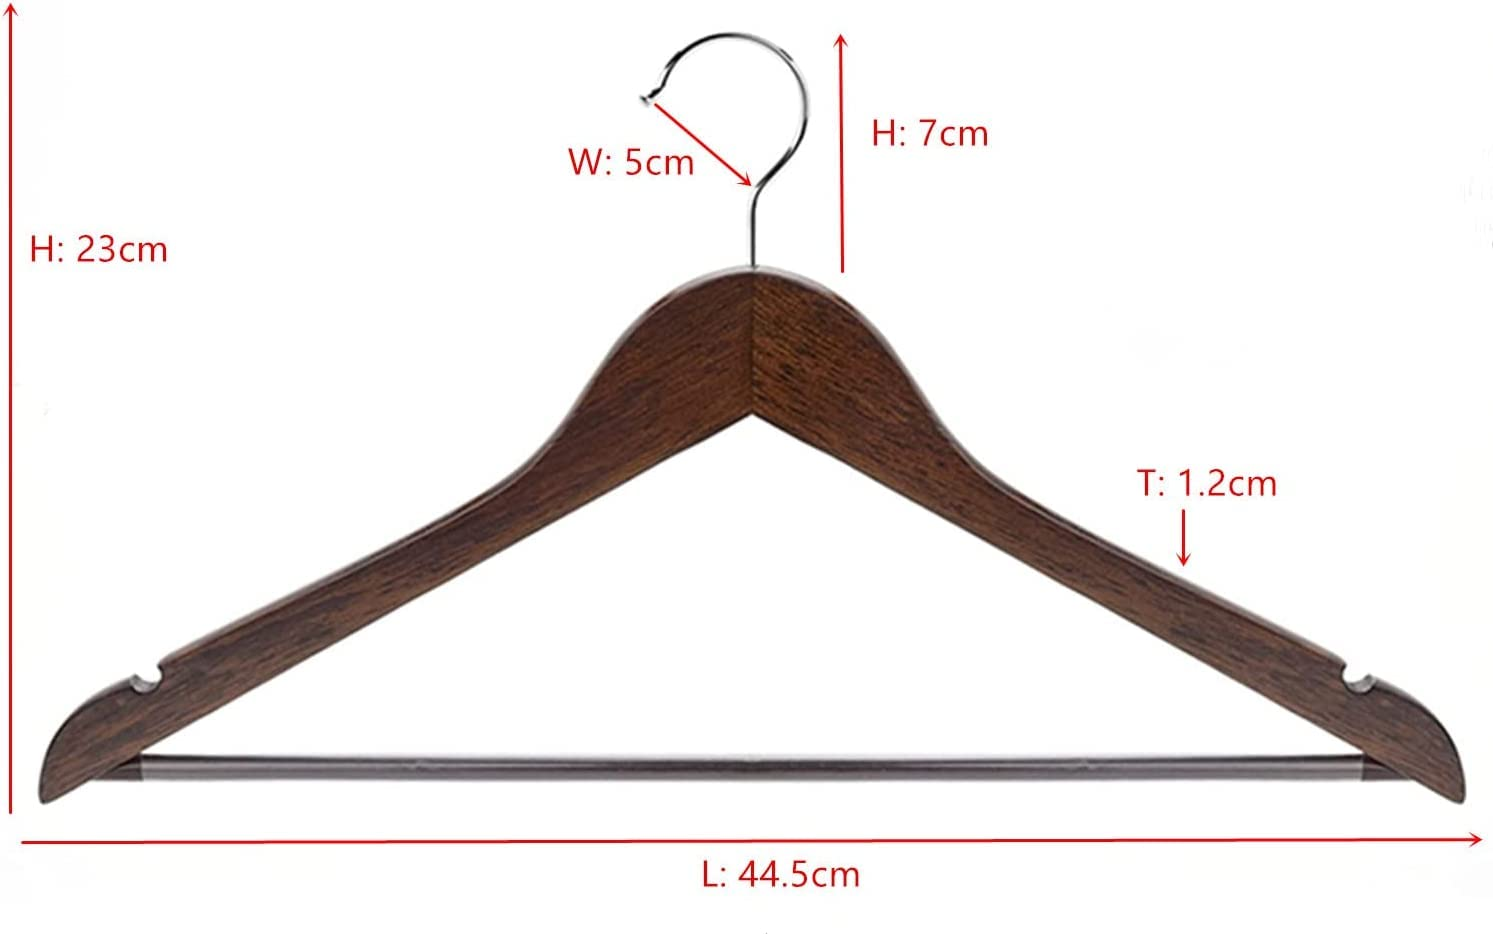

In [7]:
random_number = random.randint(0, len(data))
image_path = data['kaggle_image_path'][random_number]
Image.open(image_path)

In [8]:
image_directory = '/kaggle/input/amazon-2024-100k-imgs/images/'

data['exists'] = 0

for index, row in tqdm(data.iterrows(), total=len(data), desc="Checking images"):
    image_name = row['kaggle_image_path'].split('/')[-1]  
    image_path = os.path.join(image_directory, image_name)
    
    if os.path.exists(image_path):  
        data.at[index, 'exists'] = 1

data.head()

Checking images: 100%|██████████| 100000/100000 [04:27<00:00, 373.47it/s]


,Unnamed: 0,image_link,group_id,entity_name,entity_value,kaggle_image_path,exists
0,124275,https://m.media-amazon.com/images/I/71nRDdNdnoL.jpg,281678,item_weight,8.0 ounce,/kaggle/input/amazon-2024-100k-imgs/images/71nRDdNdnoL.jpg,1
1,177546,https://m.media-amazon.com/images/I/610wkn0vHBL.jpg,462661,width,50.5 centimetre,/kaggle/input/amazon-2024-100k-imgs/images/610wkn0vHBL.jpg,1
2,136769,https://m.media-amazon.com/images/I/51+wIR5l7vL.jpg,446789,width,54.0 inch,/kaggle/input/amazon-2024-100k-imgs/images/51+wIR5l7vL.jpg,1
3,4147,https://m.media-amazon.com/images/I/71okdOEdBtL.jpg,483370,item_weight,11.0 ounce,/kaggle/input/amazon-2024-100k-imgs/images/71okdOEdBtL.jpg,1
4,24579,https://m.media-amazon.com/images/I/61vzPJIUbNL.jpg,630869,item_weight,100 gram,/kaggle/input/amazon-2024-100k-imgs/images/61vzPJIUbNL.jpg,1


In [9]:
len(data[data['exists']==0])

0

In [10]:
data['kaggle_image_path'].value_counts()

kaggle_image_path
/kaggle/input/amazon-2024-100k-imgs/images/518O3-R2CqL.jpg    3
/kaggle/input/amazon-2024-100k-imgs/images/61+hAARC3NL.jpg    3
/kaggle/input/amazon-2024-100k-imgs/images/51GtDRWGISL.jpg    3
/kaggle/input/amazon-2024-100k-imgs/images/51i5gfb+yTS.jpg    3
/kaggle/input/amazon-2024-100k-imgs/images/51cJ9Y4BdLL.jpg    3
                                                             ..
/kaggle/input/amazon-2024-100k-imgs/images/51+ghfWTixL.jpg    1
/kaggle/input/amazon-2024-100k-imgs/images/61+h3N5GSZL.jpg    1
/kaggle/input/amazon-2024-100k-imgs/images/61F0vd074RL.jpg    1
/kaggle/input/amazon-2024-100k-imgs/images/613Vek-rgJL.jpg    1
/kaggle/input/amazon-2024-100k-imgs/images/81fqEByi9gL.jpg    1
Name: count, Length: 98834, dtype: int64

In [11]:
# After researching, I found out some files have common names.
# Thus, the images were perfectly downloaded.

In [12]:
data.drop(['exists', 'Unnamed: 0', 'image_link', 'group_id'], axis=1, inplace=True)
data.head()

,entity_name,entity_value,kaggle_image_path
0,item_weight,8.0 ounce,/kaggle/input/amazon-2024-100k-imgs/images/71nRDdNdnoL.jpg
1,width,50.5 centimetre,/kaggle/input/amazon-2024-100k-imgs/images/610wkn0vHBL.jpg
2,width,54.0 inch,/kaggle/input/amazon-2024-100k-imgs/images/51+wIR5l7vL.jpg
3,item_weight,11.0 ounce,/kaggle/input/amazon-2024-100k-imgs/images/71okdOEdBtL.jpg
4,item_weight,100 gram,/kaggle/input/amazon-2024-100k-imgs/images/61vzPJIUbNL.jpg


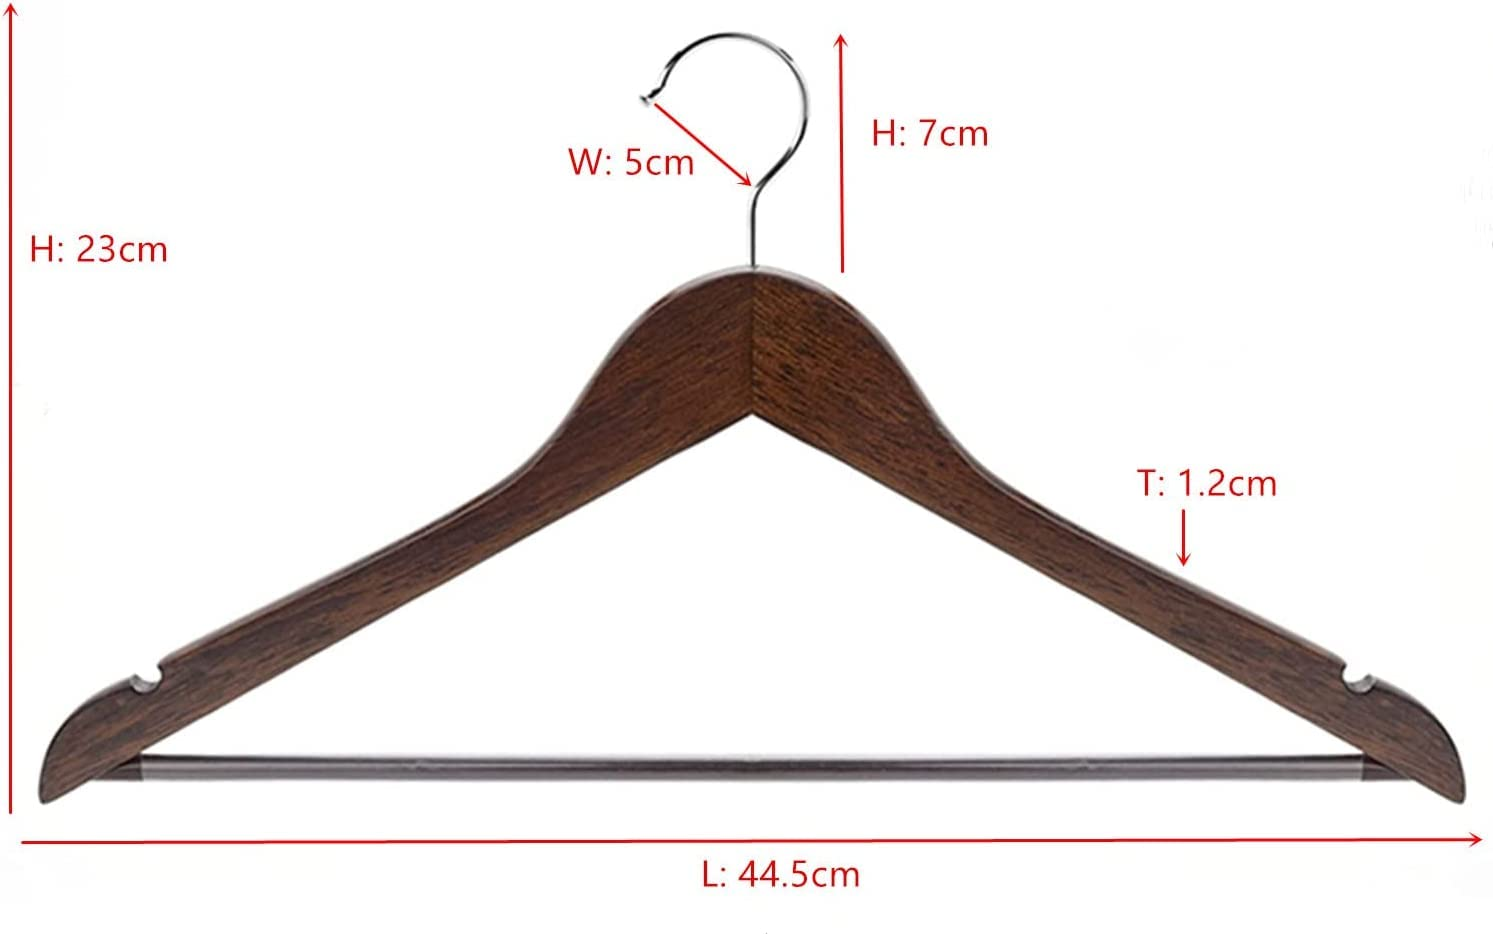

In [13]:
Image.open(data['kaggle_image_path'][random_number])

In [14]:
def plot_random_images(dataframe:pd.DataFrame, n:int):
    if n>9:
        n = 9
    plt.figure(figsize=(9, 9))
    for i in range(n):
        plt.subplot(3, 3, i+1)
        random_num = random.randint(0, len(dataframe)-1)
        image = Image.open(dataframe['kaggle_image_path'][random_num])
        plt.imshow(image)
        plt.axis('off')
        plt.title(f"{dataframe['entity_name'][random_num]} : {dataframe['entity_value'][random_num]}")
    plt.show()

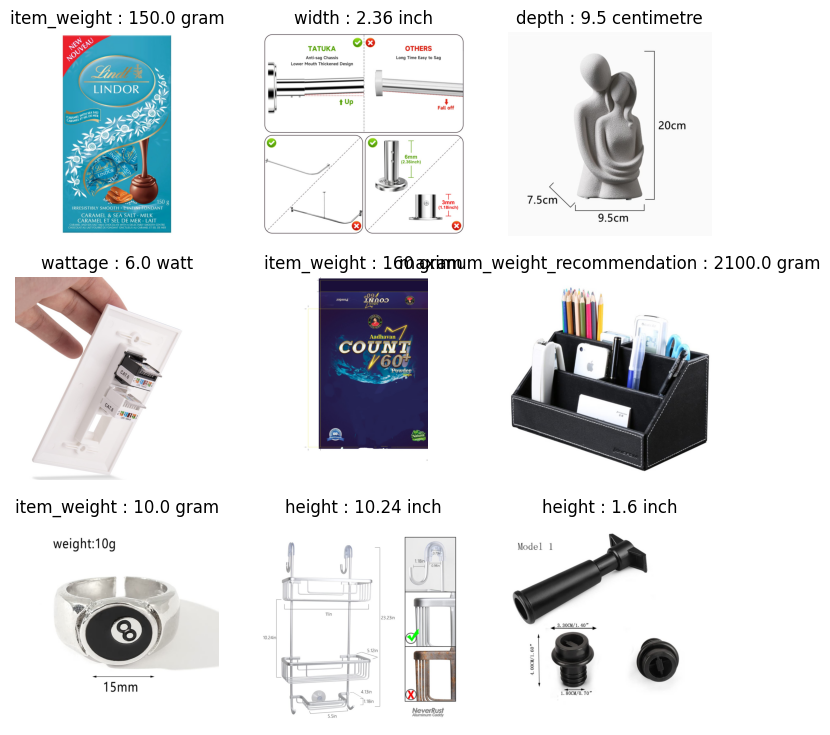

In [15]:
plot_random_images(data, 9)

In [16]:
data['entity_name'].value_counts()

entity_name
item_weight                      39116
depth                            16938
width                            16710
height                           16580
voltage                           3604
wattage                           2951
item_volume                       2875
maximum_weight_recommendation     1226
Name: count, dtype: int64

In [17]:
# Right now, I can think of 2 approaches
# 1. Equal samples training.
# 2. Stratified sampled training.

# Stratified sampling

In [18]:
data.head()

,entity_name,entity_value,kaggle_image_path
0,item_weight,8.0 ounce,/kaggle/input/amazon-2024-100k-imgs/images/71nRDdNdnoL.jpg
1,width,50.5 centimetre,/kaggle/input/amazon-2024-100k-imgs/images/610wkn0vHBL.jpg
2,width,54.0 inch,/kaggle/input/amazon-2024-100k-imgs/images/51+wIR5l7vL.jpg
3,item_weight,11.0 ounce,/kaggle/input/amazon-2024-100k-imgs/images/71okdOEdBtL.jpg
4,item_weight,100 gram,/kaggle/input/amazon-2024-100k-imgs/images/61vzPJIUbNL.jpg


In [19]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['entity_value'], axis=1), 
                                                    data['entity_value'],
                                                    stratify=data['entity_name'],
                                                    test_size=0.2)

In [20]:
train_data = pd.concat([X_train, y_train], axis=1)
train_data.to_csv('train_stratified.csv', index=False)
test_data = pd.concat([X_test, y_test], axis=1)
test_data.to_csv('test_stratified.csv', index=False)
print("Done:)")

Done:)
